## Customer Segmentation

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.
Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

Customer segmentation relies on identifying key differentiators that divide customers into groups that can be targeted. Information such as a customers' demographics (age, race, religion, gender, family size, ethnicity, income, education level), geography (where they live and work), psychographic (social class, lifestyle and personality characteristics) and behavioral (spending, consumption, usage and desired benefits) tendencies are taken into account when determining customer segmentation practices.

Benefits of customer segmentation include:

* Personalisation-Personalisation ensures that you provide exceptional customer experience.
* Customer Retention-It is 16 times as costly to build a long-term business relationship with a new customer than simply to cultivate the loyalty of an existing customer.
* Better ROI for marketing -Affirmations that right marketing messages are sent to the right people based on their life cycle stage.
* Reveal new opportunities-Customer segmentation may reveal new trends about products and it may even give the first mover’s advantage in a product segment.

In [1]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


In [2]:
#Reading the csv
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [5]:
dataset.info() # to check if there are no missing values and all the columns have 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#No null values

In [8]:
#Converting Gender column to numerical column
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes
dataset.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77


In [9]:
#1-Male and 0-Female

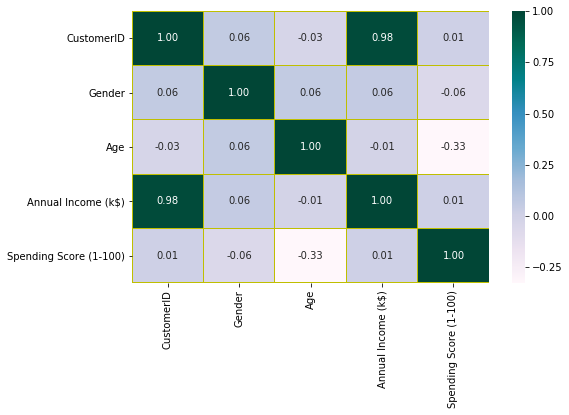

In [10]:
#Heatmap to visualise each factors correlation
fig,ax = plt.subplots(figsize = (8,5))
sns.heatmap(dataset.corr(), ax = ax, annot = True, linewidths= 0.05, fmt = '.2f',cmap='PuBuGn',linecolor='y')
plt.show()

We observe that correlations need to be investigated further as there is significantly strong dependance

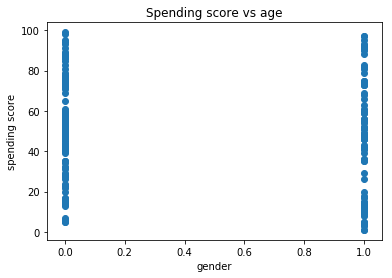

In [11]:
plt.scatter(dataset['Gender'],dataset['Spending Score (1-100)'])
plt.ylabel('spending score')
plt.xlabel('gender')
plt.title('Spending score vs age')
plt.show()

In [12]:
#Females tend to slightly spend higher than men. 

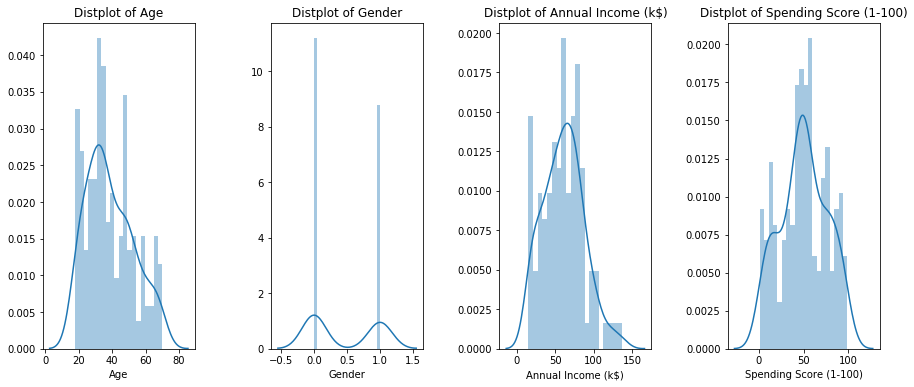

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Gender','Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

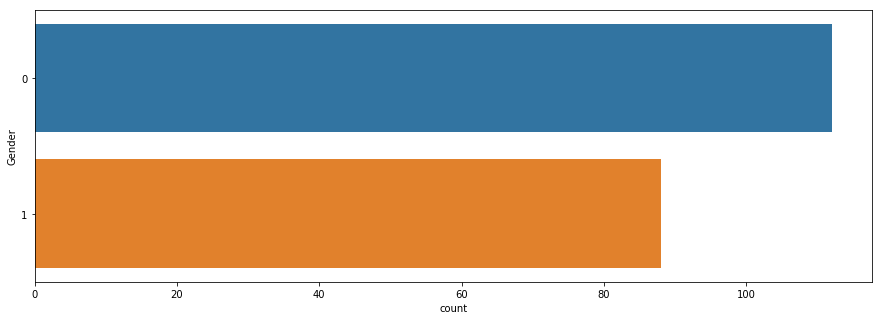

In [15]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = dataset)
plt.show()

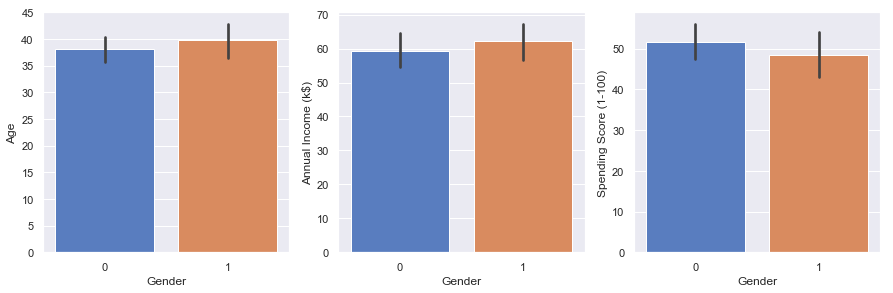

In [31]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='Age',x='Gender', data=dataset);
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='Annual Income (k$)',x='Gender', data=dataset);
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='Spending Score (1-100)',x='Gender', data=dataset)

In [33]:
#Clearly,majority of the mall customers were males but femalers spended more.
#Also there is gender balance between all features.Else our results have chances of being skewed and would favour the majority .

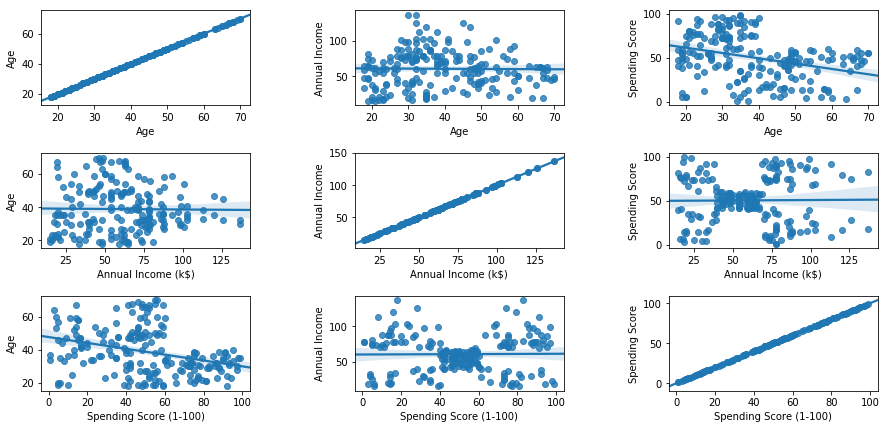

In [16]:
#Checking if any of these variables have linear relationship
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

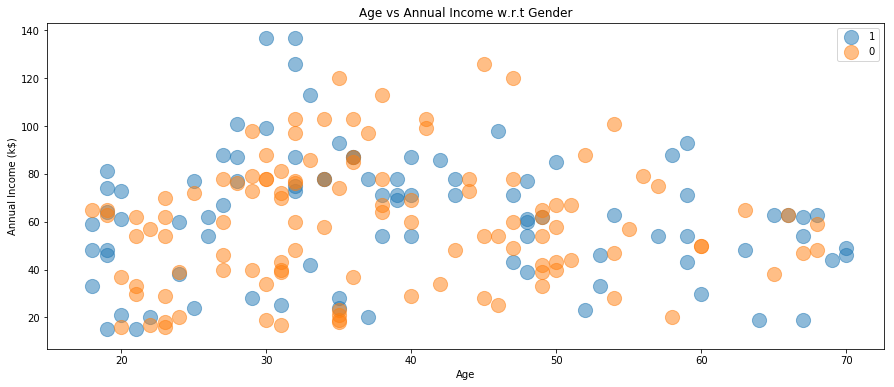

In [17]:
plt.figure(1 , figsize = (15 , 6))
for gender in [1 , 0]:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

In [19]:
#Females of all age groups spend a good amount but specifically with annual income below 50.Generally both genders have lower incomes after age of 50

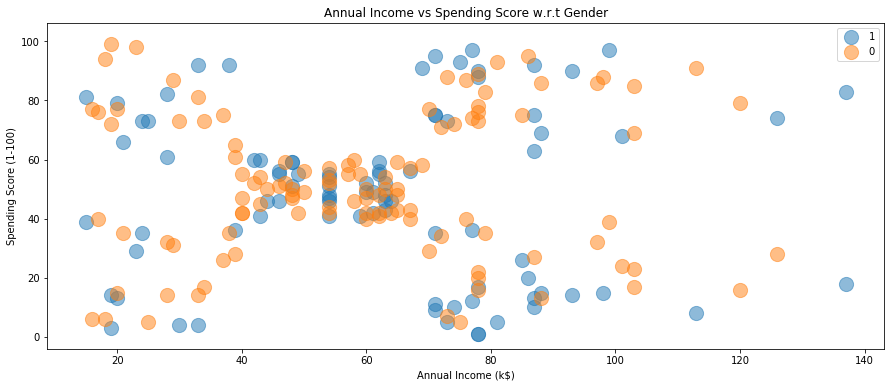

In [18]:
plt.figure(1 , figsize = (15 , 6))
for gender in [1 , 0]:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = dataset[dataset['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Here we observe 5 clusters-
* Low income(0-40) ,low expenses(0-40)
* Low income,High expenses
* Moderate income(40-65),moderate expenses(40-65)
* High income(65- 140+),high expenses(60-100)
* High income income,low expenses


Now lets try to see if we similiar clusters and patterns using unsuperviseds clustering algorithms

In [20]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values

In [21]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

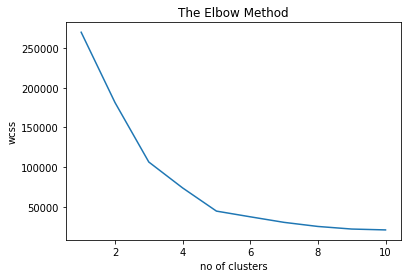

In [22]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmentation.

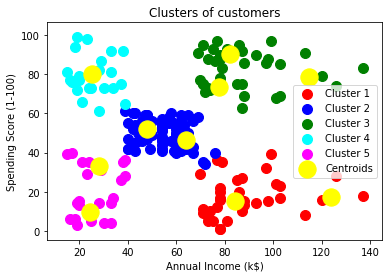

In [25]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The model interpretation is the same as discussed.

In [ ]:


######We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse 
#######wherein others we can set like once in a week or once in a month



In [26]:
#We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse 
#wherein others we can set like once in a week or once in a month

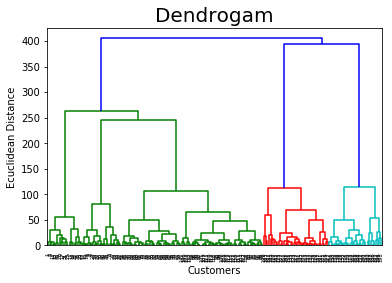

In [27]:
#Try dendogram for finding optimum number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Here also we observe 5 main clusters as we saw previously.Other clustering methods can also be tried.But this dataset is relatively easy to find clusters,hence results wont be altered much.

Another modification to current approach is sudividing dasets based on gender and trying to find clusters in them.This would help in focussing on more specific customers.